In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


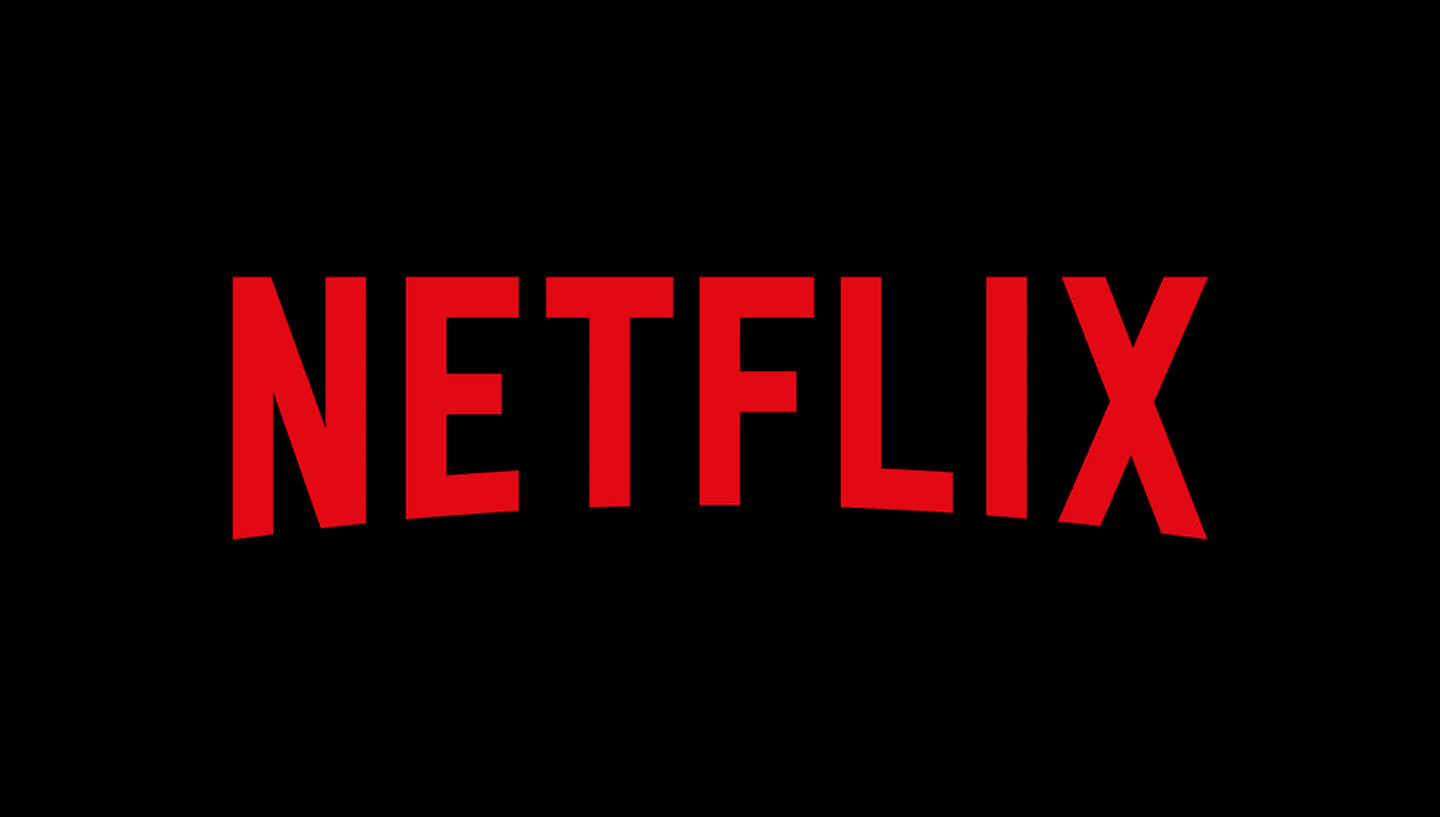

# Problem Statement:


**Business Context:**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.
In this project, you are required to do
• Exploratory Data Analysis
• Understanding what type content is available in different countries
• If Netflix has been increasingly focusing on TV rather than movies in recent years.
•Clustering similar content by matching text-based features
Dataset Description.


# Flowchart of the project



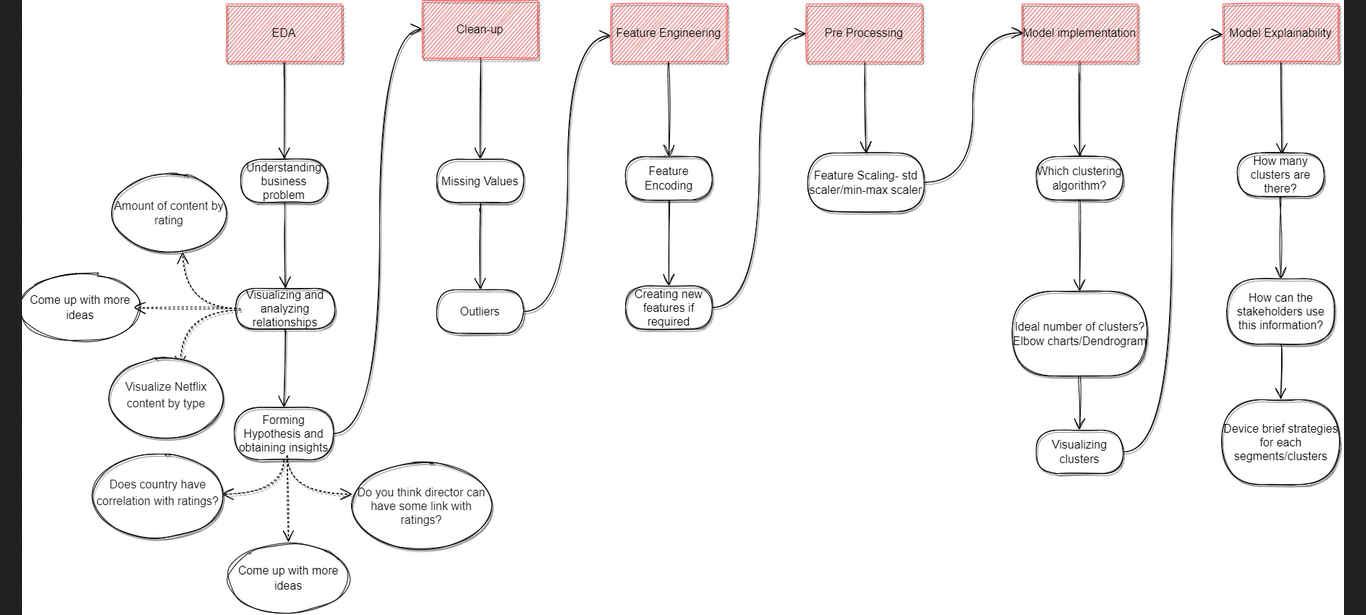

In [109]:
try:
    netflix_data=pd.read_csv("/kaggle/input/netflix-world/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
    netflix_data
except:
    print("Something went wrong")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [110]:
netflix_data.isnull().sum().sum()

3631

there are 3631 values that are null so its better not to remove the null data 

In [111]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are 2389  null values in Director(Coulmn) ,therefore I'll drop the coulmn  for better analysis.




In [112]:
netflix_data.drop(["director"],axis=1,inplace=True)

In [113]:
netflix_data["cast"].fillna("No cast",inplace=True)

In [114]:
netflix_data["country"].fillna(netflix_data["country"].mode()[0],inplace=True)

In [115]:
netflix_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [116]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   cast          7787 non-null   object
 4   country       7787 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 669.3+ KB


In [117]:
netflix_data['Encoded Type'] = netflix_data["type"].map({'TV Show':0,"Movie":1})


# Contents in Netflix******

In this we are looking for the type ,
if its a movie or TVshow


In [118]:
netflix_data["type"].unique()

array(['TV Show', 'Movie'], dtype=object)

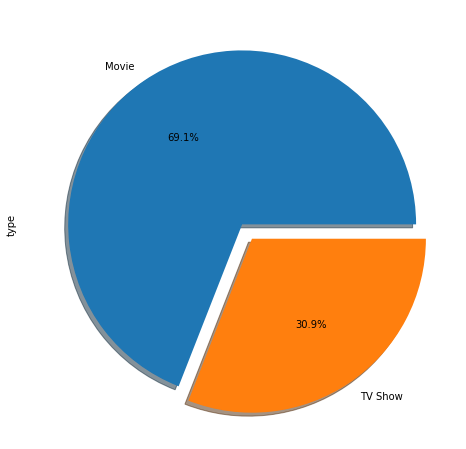

In [119]:
netflix_data['type'].value_counts().plot(kind="pie",explode=[0,0.1],figsize= (8,8),shadow=True,autopct = "%1.1f%%")
plt.show()

> The above Chart shows that in NetflixApp people watch Movies(69.1%) over Tvshow(30.9%).
******



# Top 15 Countries

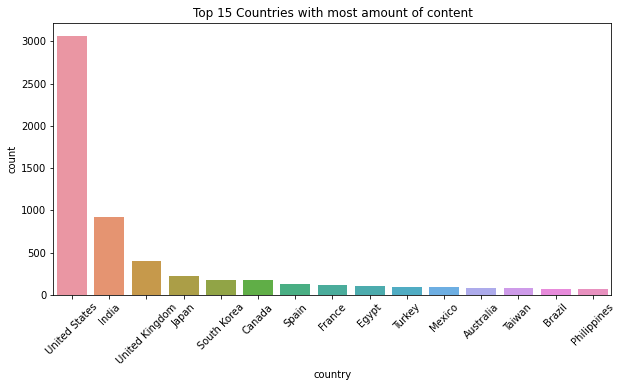

In [120]:
plt.figure(figsize=(10,5))
sns.countplot(x =netflix_data['country'],order=netflix_data['country'].value_counts().index[:15])
plt.xticks(rotation =  45)
plt.title("Top 15 Countries with most amount of content")
plt.show()
                                                                                           

# Listed 


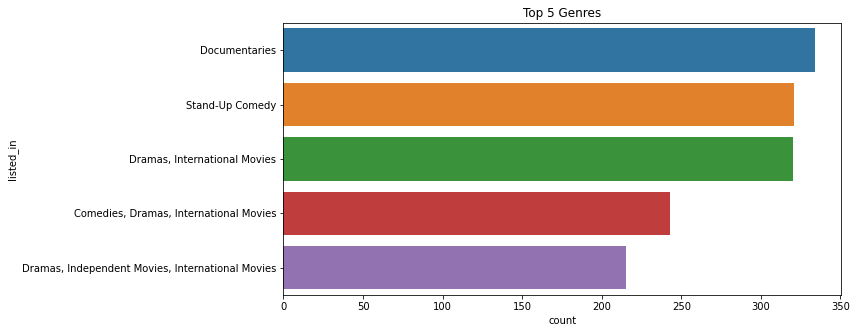

In [121]:
plt.figure(figsize=(10,5))
sns.color_palette("Paired")
sns.countplot(y = netflix_data['listed_in'],data = netflix_data,order=netflix_data['listed_in'].value_counts().index[:5]) 
plt.title("Top 5 Genres")
plt.show()


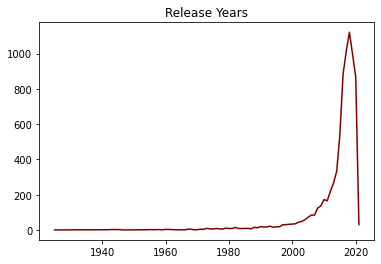

In [122]:
RY = netflix_data['release_year'].value_counts().sort_index(ascending = False)
RY.plot(color="maroon")

plt.title("Release Years")
plt.show()


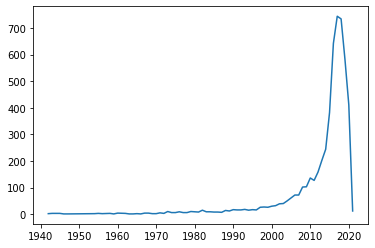

In [123]:
RY_M=netflix_data[netflix_data['type'] == "Movie"]['release_year'].value_counts().sort_index(ascending = False)
RY_M.plot()
plt.show()

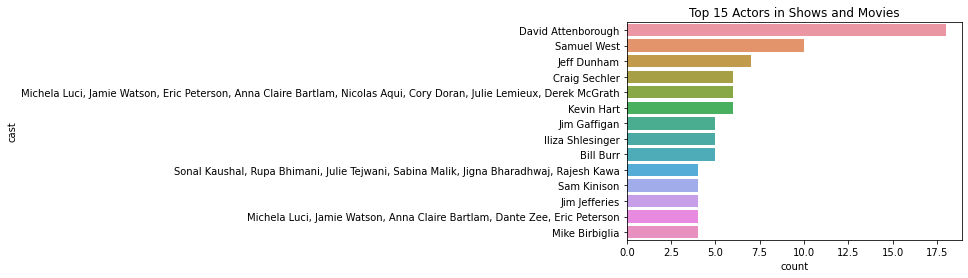

In [124]:
sns.countplot(y= netflix_data['cast'],data = netflix_data,order=netflix_data['cast'].value_counts().index[1:15])
plt.title("Top 15 Actors in Shows and Movies")
plt.show()

In [125]:
len(netflix_data["rating"].unique())

15

In [126]:
netflix_data["rating"].unique()



array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [127]:
netflix_data[netflix_data.rating=="nan"].count()



show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
Encoded Type    0
dtype: int64

# Rating

* TV-MA= above 17,*'R'=Under 17 requires accompanying parent or adult guardian
* 'PG-13'=Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may not be appropriate for pre-teenagers.
* 'UR'=All ages admitted ,* NC-17= (No One 17 and Under Admitted) ,* TV-Y7-FV=indicates that programming is designed for chil- dren ages 7 and older
* G=for kids,PG= Parental guidance suggested – Some material may not be suitable for pre-teenagers,
* TV-Y7=rating means that programming is appropriate for children of all ages. 
* TV-Y=rating means that programming is appropriate for children of all ages,
* TV-G=little or no sexual dialogue or situations,* TV-PG=Parental guidance ,* TV-14=This program contains some material that many parents would find unsuitable for children under 14 years of age
# Indian Ratings
* U= for all ages
* U/A=unrestricted public exhibition subject to parental guidance for children below the age of     twelve.
* A=restricted to adult audiences


In [128]:
netflix_data.dropna(subset= ['date_added','rating'],inplace = True)

In [129]:
netflix_data = netflix_data[netflix_data['rating']!="NR"]


In [130]:
netflix_data['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [131]:
netflix_data.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
Encoded Type    0
dtype: int64

In [132]:
netflix_data["Indian_Ratings"]=netflix_data.rating.map({"TV-MA":"A","PG-13":"U","TV-14":"U","TV-PG":"U/A","TV-G":"U","TV-Y":"U","TV-Y7":"U","PG":"U/A","G":"U","NC-17":"U/A","TV-Y7-FV":"U","UR":"U","R":"A"})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:

netflix_data

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,Encoded Type,Indian_Ratings
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,0,A
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1,A
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,A
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1,U
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,1,A
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,1,U
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",1,A
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,0,U/A


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


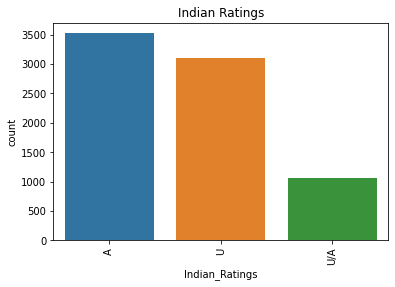

In [134]:
sns.countplot(netflix_data["Indian_Ratings"],data=netflix_data)
plt.title("Indian Ratings")
plt.xticks(rotation = 90)

plt.show()


# NLP(Natural Language Process)

In [136]:
import nltk

In [137]:
def mytokenizer(description): 
    text=description.split()
    return text


In [138]:
netflix_data["Txt_tokenizer"]=netflix_data["description"].apply(lambda x:mytokenizer(x.lower()))



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:

netflix_data.head()


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,Encoded Type,Indian_Ratings,Txt_tokenizer
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,0,A,"[in, a, future, where, the, elite, inhabit, an..."
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1,A,"[after, a, devastating, earthquake, hits, mexi..."
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,A,"[when, an, army, recruit, is, found, dead,, hi..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1,U,"[in, a, postapocalyptic, world,, rag-doll, rob..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,U,"[a, brilliant, group, of, students, become, ca..."


In [140]:
stopwords=nltk.corpus.stopwords.words("english")


In [141]:
def stopwordsRemover(description):
    text=[word for word in description if word not in stopwords]
    return text

In [142]:
netflix_data["Txt_stopwords"]=netflix_data["Txt_tokenizer"].apply(lambda x:stopwordsRemover(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
netflix_data.head(10)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,Encoded Type,Indian_Ratings,Txt_tokenizer,Txt_stopwords
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,0,A,"[in, a, future, where, the, elite, inhabit, an...","[future, elite, inhabit, island, paradise, far..."
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1,A,"[after, a, devastating, earthquake, hits, mexi...","[devastating, earthquake, hits, mexico, city,,..."
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,A,"[when, an, army, recruit, is, found, dead,, hi...","[army, recruit, found, dead,, fellow, soldiers..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1,U,"[in, a, postapocalyptic, world,, rag-doll, rob...","[postapocalyptic, world,, rag-doll, robots, hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,U,"[a, brilliant, group, of, students, become, ca...","[brilliant, group, students, become, card-coun..."
5,s6,TV Show,46,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,0,A,"[a, genetics, professor, experiments, with, a,...","[genetics, professor, experiments, treatment, ..."
6,s7,Movie,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",1,A,"[after, an, awful, accident,, a, couple, admit...","[awful, accident,, couple, admitted, grisly, h..."
7,s8,Movie,187,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...,1,A,"[after, one, of, his, high, school, students, ...","[one, high, school, students, attacks, him,, d..."
8,s9,Movie,706,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",1,U,"[when, a, doctor, goes, missing,, his, psychia...","[doctor, goes, missing,, psychiatrist, wife, t..."
9,s10,Movie,1920,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,1,A,"[an, architect, and, his, wife, move, into, a,...","[architect, wife, move, castle, slated, become..."


In [144]:
ps=nltk.PorterStemmer()

In [145]:
def myStemmer(description):
    text=[ps.stem(word) for word in description]
    return text

In [146]:
netflix_data["Txt_Stem"]=netflix_data["Txt_stopwords"].apply(lambda x:myStemmer(x))



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [147]:
netflix_data.head()


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,Encoded Type,Indian_Ratings,Txt_tokenizer,Txt_stopwords,Txt_Stem
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,0,A,"[in, a, future, where, the, elite, inhabit, an...","[future, elite, inhabit, island, paradise, far...","[futur, elit, inhabit, island, paradis, far, c..."
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1,A,"[after, a, devastating, earthquake, hits, mexi...","[devastating, earthquake, hits, mexico, city,,...","[devast, earthquak, hit, mexico, city,, trap, ..."
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,A,"[when, an, army, recruit, is, found, dead,, hi...","[army, recruit, found, dead,, fellow, soldiers...","[armi, recruit, found, dead,, fellow, soldier,..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1,U,"[in, a, postapocalyptic, world,, rag-doll, rob...","[postapocalyptic, world,, rag-doll, robots, hi...","[postapocalypt, world,, rag-dol, robot, hide, ..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,U,"[a, brilliant, group, of, students, become, ca...","[brilliant, group, students, become, card-coun...","[brilliant, group, student, becom, card-count,..."


In [148]:
netflix_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,Encoded Type,Indian_Ratings,Txt_tokenizer,Txt_stopwords,Txt_Stem
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,0,A,"[in, a, future, where, the, elite, inhabit, an...","[future, elite, inhabit, island, paradise, far...","[futur, elit, inhabit, island, paradis, far, c..."
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1,A,"[after, a, devastating, earthquake, hits, mexi...","[devastating, earthquake, hits, mexico, city,,...","[devast, earthquak, hit, mexico, city,, trap, ..."
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,A,"[when, an, army, recruit, is, found, dead,, hi...","[army, recruit, found, dead,, fellow, soldiers...","[armi, recruit, found, dead,, fellow, soldier,..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1,U,"[in, a, postapocalyptic, world,, rag-doll, rob...","[postapocalyptic, world,, rag-doll, robots, hi...","[postapocalypt, world,, rag-dol, robot, hide, ..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,U,"[a, brilliant, group, of, students, become, ca...","[brilliant, group, students, become, card-coun...","[brilliant, group, student, becom, card-count,..."


In [149]:
data=netflix_data.copy()

In [150]:
import string
punct=list(string.punctuation)

print(punct)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [151]:
def removePunctuation(description):
    description="".join([i for i in description if i not in string.punctuation])
    return description

In [152]:
data["description"]=data["description"].apply(removePunctuation)
data["title"]=data["title"].apply(removePunctuation)
data["listed_in"]=data["listed_in"].apply(removePunctuation)


In [153]:
data.head()


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,Encoded Type,Indian_Ratings,Txt_tokenizer,Txt_stopwords,Txt_Stem
0,s1,TV Show,3,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International TV Shows TV Dramas TV SciFi Fan...,In a future where the elite inhabit an island ...,0,A,"[in, a, future, where, the, elite, inhabit, an...","[future, elite, inhabit, island, paradise, far...","[futur, elit, inhabit, island, paradis, far, c..."
1,s2,Movie,719,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas International Movies,After a devastating earthquake hits Mexico Cit...,1,A,"[after, a, devastating, earthquake, hits, mexi...","[devastating, earthquake, hits, mexico, city,,...","[devast, earthquak, hit, mexico, city,, trap, ..."
2,s3,Movie,2359,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies International Movies,When an army recruit is found dead his fellow ...,1,A,"[when, an, army, recruit, is, found, dead,, hi...","[army, recruit, found, dead,, fellow, soldiers...","[armi, recruit, found, dead,, fellow, soldier,..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action Adventure Independent Movies SciFi Fa...,In a postapocalyptic world ragdoll robots hide...,1,U,"[in, a, postapocalyptic, world,, rag-doll, rob...","[postapocalyptic, world,, rag-doll, robots, hi...","[postapocalypt, world,, rag-dol, robot, hide, ..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become cardcount...,1,U,"[a, brilliant, group, of, students, become, ca...","[brilliant, group, students, become, card-coun...","[brilliant, group, student, becom, card-count,..."


In [154]:
movies_data=data[["type","country","release_year","listed_in","Indian_Ratings","Txt_Stem"]]

In [155]:
movies_data


,type,country,release_year,listed_in,Indian_Ratings,Txt_Stem
0,TV Show,Brazil,2020,International TV Shows TV Dramas TV SciFi Fan...,A,"[futur, elit, inhabit, island, paradis, far, c..."
1,Movie,Mexico,2016,Dramas International Movies,A,"[devast, earthquak, hit, mexico, city,, trap, ..."
2,Movie,Singapore,2011,Horror Movies International Movies,A,"[armi, recruit, found, dead,, fellow, soldier,..."
3,Movie,United States,2009,Action Adventure Independent Movies SciFi Fa...,U,"[postapocalypt, world,, rag-dol, robot, hide, ..."
4,Movie,United States,2008,Dramas,U,"[brilliant, group, student, becom, card-count,..."
...,...,...,...,...,...,...
7782,Movie,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,Dramas International Movies,A,"[lebanon', civil, war, depriv, zozo, family,, ..."
7783,Movie,India,2015,Dramas International Movies Music Musicals,U,"[scrappi, poor, boy, worm, way, tycoon', dysfu..."
7784,Movie,United States,2019,Documentaries International Movies Music Musi...,A,"[documentary,, south, african, rapper, nasti, ..."
7785,TV Show,Australia,2019,International TV Shows Reality TV,U/A,"[dessert, wizard, adriano, zumbo, look, next, ..."


In [156]:
def convertText(lst):
    str1=""
    for i in lst:
        str1+= i + " "
    return str1

In [157]:
movies_data["Txt_Stem"]=movies_data["Txt_Stem"].apply(convertText)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
movies_data.head()

,type,country,release_year,listed_in,Indian_Ratings,Txt_Stem
0,TV Show,Brazil,2020,International TV Shows TV Dramas TV SciFi Fan...,A,futur elit inhabit island paradis far crowd sl...
1,Movie,Mexico,2016,Dramas International Movies,A,"devast earthquak hit mexico city, trap survivo..."
2,Movie,Singapore,2011,Horror Movies International Movies,A,"armi recruit found dead, fellow soldier forc c..."
3,Movie,United States,2009,Action Adventure Independent Movies SciFi Fa...,U,"postapocalypt world, rag-dol robot hide fear d..."
4,Movie,United States,2008,Dramas,U,brilliant group student becom card-count exper...


In [159]:
from sklearn  import preprocessing

In [160]:
data2=movies_data.copy()

In [161]:
data2.head()

,type,country,release_year,listed_in,Indian_Ratings,Txt_Stem
0,TV Show,Brazil,2020,International TV Shows TV Dramas TV SciFi Fan...,A,futur elit inhabit island paradis far crowd sl...
1,Movie,Mexico,2016,Dramas International Movies,A,"devast earthquak hit mexico city, trap survivo..."
2,Movie,Singapore,2011,Horror Movies International Movies,A,"armi recruit found dead, fellow soldier forc c..."
3,Movie,United States,2009,Action Adventure Independent Movies SciFi Fa...,U,"postapocalypt world, rag-dol robot hide fear d..."
4,Movie,United States,2008,Dramas,U,brilliant group student becom card-count exper...


In [162]:
le=preprocessing.LabelEncoder()
data2["type"]=le.fit_transform(movies_data["type"])
data2["country"]=le.fit_transform(movies_data["country"])
data2["release_year"]=le.fit_transform(movies_data["release_year"])
data2["listed_in"]=le.fit_transform(movies_data["listed_in"])
data2["Indian_Ratings"]=le.fit_transform(movies_data["Indian_Ratings"])
data2["Txt_Stem"]=le.fit_transform(movies_data["Txt_Stem"])


In [163]:
Predata=movies_data["listed_in"]+movies_data["Txt_Stem"]

In [164]:
Predata

0       International TV Shows TV Dramas TV SciFi  Fan...
1       Dramas International Moviesdevast earthquak hi...
2       Horror Movies International Moviesarmi recruit...
3       Action  Adventure Independent Movies SciFi  Fa...
4       Dramasbrilliant group student becom card-count...
                              ...                        
7782    Dramas International Movieslebanon' civil war ...
7783    Dramas International Movies Music  Musicalsscr...
7784    Documentaries International Movies Music  Musi...
7785    International TV Shows Reality TVdessert wizar...
7786    Documentaries Music  Musicalsdocumentari delv ...
Length: 7687, dtype: object

In [165]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [166]:
STOPWORDS=set(stopwords.words('english'))

In [167]:
from sklearn.feature_extraction.text  import TfidfVectorizer

In [168]:
vectorizer = TfidfVectorizer(stop_words = STOPWORDS,max_features = 1000)
vectText = vectorizer.fit_transform(Predata)
print(vectorizer.get_feature_names())

['000', '10', '20', '30', 'abandon', 'abduct', 'abil', 'abus', 'accept', 'accid', 'accident', 'account', 'accus', 'across', 'act', 'action', 'activist', 'actor', 'actress', 'adapt', 'addict', 'adopt', 'adult', 'adventur', 'adventure', 'affair', 'africa', 'african', 'ag', 'age', 'agent', 'ago', 'agre', 'alien', 'along', 'also', 'alway', 'ambiti', 'america', 'american', 'amid', 'among', 'ancient', 'angel', 'anim', 'anime', 'anoth', 'answer', 'anyth', 'apart', 'appear', 'armi', 'around', 'arrang', 'arriv', 'art', 'artist', 'ask', 'aspir', 'assassin', 'assist', 'athlet', 'attack', 'attempt', 'attend', 'author', 'aveng', 'avoid', 'await', 'away', 'babi', 'bachelor', 'back', 'bad', 'band', 'bank', 'base', 'battl', 'bear', 'beauti', 'becom', 'befriend', 'begin', 'behind', 'believ', 'belov', 'best', 'better', 'beyond', 'big', 'biggest', 'bill', 'birth', 'black', 'bodi', 'bond', 'book', 'boss', 'boy', 'boyfriend', 'brave', 'break', 'bride', 'bring', 'british', 'brother', 'brutal', 'buddi', 'bui

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [169]:
vfid=vectorizer.idf_



In [170]:
vectorized_dict=dict(zip(vectorizer.get_feature_names(),vfid))

{'000': 6.392067889160715,
 '10': 6.336498038005904,
 '20': 6.689319412628646,
 '30': 6.728540125781928,
 'abandon': 6.6152114404749245,
 'abduct': 6.7693621203021825,
 'abil': 6.728540125781928,
 'abus': 6.481680047850402,
 'accept': 6.6515790846458,
 'accid': 6.689319412628646,
 'accident': 5.9043646828155785,
 'account': 6.7693621203021825,
 'accus': 6.450908389183648,
 'across': 5.853071388428027,
 'act': 6.076214939742237,
 'action': 3.1561944879239427,
 'activist': 6.392067889160715,
 'actor': 5.958431904085854,
 'actress': 6.6515790846458,
 'adapt': 6.7693621203021825,
 'addict': 6.811921734720979,
 'adopt': 6.6152114404749245,
 'adult': 6.392067889160715,
 'adventur': 5.005773528040824,
 'adventure': 3.334031732270569,
 'affair': 6.283854304520482,
 'africa': 6.6515790846458,
 'african': 6.481680047850402,
 'ag': 6.450908389183648,
 'age': 6.015590317925803,
 'agent': 5.256068068420984,
 'ago': 6.7693621203021825,
 'agre': 6.481680047850402,
 'alien': 6.140753460879808,
 'along

In [171]:
from sklearn.preprocessing import MinMaxScaler

In [172]:
data2.head()

,type,country,release_year,listed_in,Indian_Ratings,Txt_Stem
0,1,38,71,397,0,2992
1,0,303,67,309,0,1683
2,0,374,62,335,0,476
3,0,542,60,47,1,5088
4,0,542,59,293,1,883


In [173]:
scaler=MinMaxScaler()
sc = scaler.fit_transform(data2)
NETFLIX = pd.DataFrame(sc,columns = list(data2.columns))
NETFLIX

,type,country,release_year,listed_in,Indian_Ratings,Txt_Stem
0,1.0,0.056632,0.986111,0.810204,0.0,0.390193
1,0.0,0.451565,0.930556,0.630612,0.0,0.219484
2,0.0,0.557377,0.861111,0.683673,0.0,0.062076
3,0.0,0.807750,0.833333,0.095918,0.5,0.663537
4,0.0,0.807750,0.819444,0.597959,0.5,0.115154
...,...,...,...,...,...,...
7682,0.0,0.631893,0.777778,0.630612,0.0,0.521127
7683,0.0,0.333830,0.916667,0.634694,0.5,0.734872
7684,0.0,0.807750,0.972222,0.546939,0.0,0.251826
7685,1.0,0.017884,0.972222,0.748980,1.0,0.213354


In [174]:
scaler=MinMaxScaler()
sc = scaler.fit_transform(data2)
NETFLIX = pd.DataFrame(sc,columns = list(data2.columns))
NETFLIX

,type,country,release_year,listed_in,Indian_Ratings,Txt_Stem
0,1.0,0.056632,0.986111,0.810204,0.0,0.390193
1,0.0,0.451565,0.930556,0.630612,0.0,0.219484
2,0.0,0.557377,0.861111,0.683673,0.0,0.062076
3,0.0,0.807750,0.833333,0.095918,0.5,0.663537
4,0.0,0.807750,0.819444,0.597959,0.5,0.115154
...,...,...,...,...,...,...
7682,0.0,0.631893,0.777778,0.630612,0.0,0.521127
7683,0.0,0.333830,0.916667,0.634694,0.5,0.734872
7684,0.0,0.807750,0.972222,0.546939,0.0,0.251826
7685,1.0,0.017884,0.972222,0.748980,1.0,0.213354


In [175]:
from sklearn.cluster import KMeans

In [176]:
kmeans=[KMeans(n_clusters=i)for i in range(1,20)]
score=[kmeans[i].fit(NETFLIX).score(NETFLIX)for i in range(len(kmeans))]
n=range(1,20)


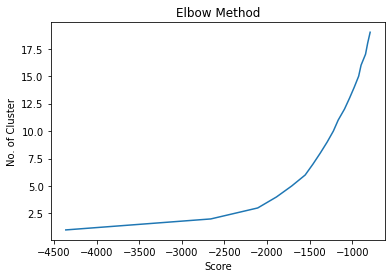

In [177]:
plt.plot(score,n)
plt.title("Elbow Method")
plt.xlabel("Score")
plt.ylabel("No. of Cluster")
plt.show()


**The above Eblow graph shows 3 clusters as the optimum value.We shall be further investigating more using dendorgrams.**

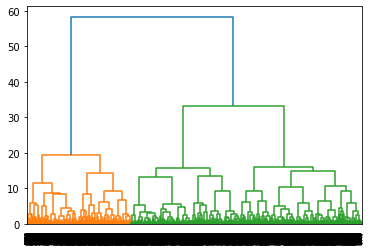

<Figure size 2160x1440 with 0 Axes>

In [178]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(NETFLIX,method='ward'))
plt.figure(figsize=(30,20))
plt.show()


Both the Elbow technique and the dendogram produced 3 Clusters, therefore we will continue in the same manner.

In [179]:
kmeans =KMeans(n_clusters=3)
kmeans.fit(vectText)
y=kmeans.predict(vectText)

In [180]:
kmeans.labels_

array([0, 2, 2, ..., 2, 0, 2], dtype=int32)

In [181]:
NETFLIX["Clusters"]= kmeans.labels_


In [182]:
NETFLIX.head(20)


,type,country,release_year,listed_in,Indian_Ratings,Txt_Stem,Clusters
0,1.0,0.056632,0.986111,0.810204,0.0,0.390193,0
1,0.0,0.451565,0.930556,0.630612,0.0,0.219484,2
2,0.0,0.557377,0.861111,0.683673,0.0,0.062076,2
3,0.0,0.807750,0.833333,0.095918,0.5,0.663537,2
4,0.0,0.807750,0.819444,0.597959,0.5,0.115154,2
5,1.0,0.660209,0.930556,0.808163,0.0,0.394105,0
6,0.0,0.196721,0.972222,0.683673,0.0,0.075509,2
7,0.0,0.807750,0.666667,0.597959,0.0,0.627021,2
8,0.0,0.333830,0.972222,0.683673,0.5,0.234090,2
9,0.0,0.333830,0.819444,0.689796,0.0,0.058294,2


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


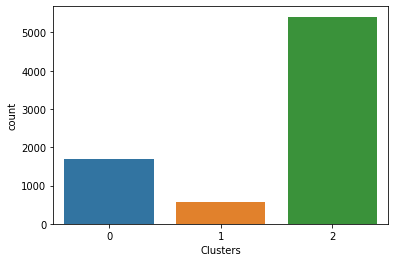

In [183]:
sns.countplot(NETFLIX["Clusters"])
plt.show()


# Conclusion


1. Netflix offer two categories of content. Movies and TV shows A combination of 30.86% TV series and 69.14% movies are included.

2. The United Nations has the most content on Netflix in terms of movies and TV shows that have been released.

3. With the most titles, mostly from other countries, Jan Suter is the most well-known filmmaker on Netflix.

4. The most content is found in the Netflix genre of dramas, and the most content is added there.

5. Using a variety of clustering methods on our dataset. We discover that three clusters are the ideal quantity.

6. Netflix offers a wide variety of genres for its viewers, but some of the top three include documentaries, stand-up comedy, and drama, with a great selection of international movies.

7. When it comes to rating movies, the United States and India have very different systems in place. In the United States, the Motion Picture Association of America (MPAA) has a rating system that consists of several different categories, including G (General Audiences), PG (Parental Guidance Suggested), PG-13 (Parents Strongly Cautioned), R (Restricted), and NC-17 (No Children Under 17 Admitted). These ratings are based on the level of content that is considered appropriate for different age groups and are intended to help parents make informed decisions about what movies their children should see. In contrast, India has a much simpler rating system that consists of only three categories: U (Universal), U/A (Parental Guidance), and A (Adult). The U rating is given to movies that are suitable for all audiences, the U/A rating is given to movies that may have some content that is not suitable for children, and the A rating is given to movies that are intended for adult audiences only.


8. The Impact of COVID-19 on Netflix Movie Releases The COVID-19 pandemic has had a significant impact on the entertainment industry, and Netflix is no exception. In the early days of the pandemic, the streaming giant was forced to temporarily halt the release of new movies as production came to a standstill.There have been  signs of recovery in the industry and the production is back to normal 

9. David Attenborough is  the Top Most Actor in Shows and Movies According to Netflix Data


